In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()

> # **Aula 023** - Redes Adversariais Generativas - **Tensorflow: GANs**

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


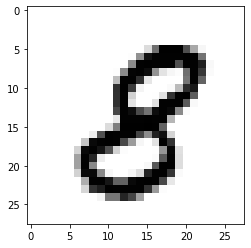

In [202]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist/', one_hot= True)
plt.imshow(mnist.train.images[5].reshape(28,28), cmap='Greys')

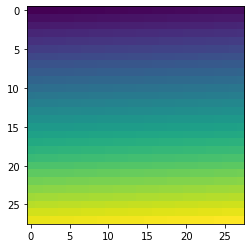

In [203]:
img_01 = np.arange(0, 784).reshape(28,28)
plt.imshow(img_01)

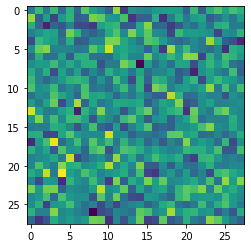

In [204]:
img_02 = np.random.normal(size= 784).reshape(28,28)
plt.imshow(img_02)

In [0]:
ruido_ph = tf.placeholder(tf.float32, shape= [None, 100])

def gerador(ruido, _reuse= True):
  with tf.variable_scope('gerador', reuse= _reuse):
    # Estrutura da rede
    # entrada 100 -> oculta1 128 -> oculta2 128 -> saida 784
    camada_oculta1 = tf.nn.relu( tf.layers.dense(inputs= ruido, units= 128) )
    camada_oculta2 = tf.nn.relu( tf.layers.dense(inputs= camada_oculta1, units= 128) )
    camada_saida = tf.layers.dense(inputs= camada_oculta2, units= 784, activation= tf.nn.tanh)
    return camada_saida

In [0]:
img_reais_ph = tf.placeholder(tf.float32, [None, 784])

def discriminador(X, _reuse= True):
  with tf.variable_scope('discriminador', reuse= _reuse):
    # Estrutura da rede
    # entrada 784 -> oculta1 128 -> oculta2 128 -> saida 1
    camada_oculta1 = tf.nn.relu( tf.layers.dense(inputs= X, units= 128) )
    camada_oculta2 = tf.nn.relu( tf.layers.dense(inputs= camada_oculta1, units= 128) )
    logits = tf.layers.dense(inputs= camada_oculta2, units= 1)
    return logits

In [0]:
logits_img_reais = discriminador(img_reais_ph, None)
logits_img_ruidos = discriminador(gerador(ruido_ph, None), True)

erro_discriminador_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits= logits_img_reais, labels= tf.ones_like(logits_img_reais) * 0.9)
)
erro_discriminador_ruido = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits= logits_img_ruidos, labels= tf.zeros_like(logits_img_reais))
)
erro_discriminador = erro_discriminador_real + erro_discriminador_ruido

erro_gerador = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits= logits_img_ruidos, labels= tf.ones_like(logits_img_ruidos))
)

In [208]:
variaveis = tf.trainable_variables()
variaveis

[<tf.Variable 'discriminador/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_2/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_2/bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense/kernel:0' shape=(100, 128) dtype=float32_ref>,
 <tf.Variable 'gerador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_2/kernel:0' shape=(128, 784) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_2/bias:0' shape=(784,) dtype=float32_ref>]

In [209]:
variaveis_discriminador = [v for v in variaveis if 'discriminador' in v.name]
variaveis_discriminador

[<tf.Variable 'discriminador/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_2/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_2/bias:0' shape=(1,) dtype=float32_ref>]

In [210]:
variaveis_gerador = [v for v in variaveis if 'gerador' in v.name]
variaveis_gerador

[<tf.Variable 'gerador/dense/kernel:0' shape=(100, 128) dtype=float32_ref>,
 <tf.Variable 'gerador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_2/kernel:0' shape=(128, 784) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_2/bias:0' shape=(784,) dtype=float32_ref>]

In [0]:
treinamento_discriminador = tf.train.AdamOptimizer(learning_rate= 0.001).minimize(erro_discriminador,
                                                                                  var_list= variaveis_discriminador)
treinamento_gerador = tf.train.AdamOptimizer(learning_rate= 0.001).minimize(erro_gerador,
                                                                            var_list= variaveis_gerador)

In [215]:
batch_size = 100
amostras_teste = []
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  #(-1, 1, ... ) -> tf.nn.tanh | (0, 1, ...) tf.nn.sigmoid
  #ruido_testes = np.random.uniform(-1, 1, size=(1, 100))
  #amostra = sess.run(generador(ruido_ph), feed_dict= {ruido_ph: ruido_testes})

  for epoch in range(500):
    num_batches = mnist.train.num_examples // batch_size
    for i in range(num_batches):
      batch = mnist.train.next_batch(batch_size)
      img_batch = batch[0].reshape((100,784))
      img_batch = img_batch * 2 - 1
      
      batch_ruido = np.random.uniform(-1, 1, size=(batch_size, 100))
      _, custod = sess.run([treinamento_discriminador, erro_discriminador], 
                          feed_dict= {img_reais_ph: img_batch, ruido_ph: batch_ruido})
      _, custog = sess.run([treinamento_gerador, erro_gerador], 
                           feed_dict= {ruido_ph: batch_ruido})
      
    print(f'epoch {epoch} - erroD {custod} - erroG {custog}')
    
    ruido_teste = np.random.uniform(-1, 1, size=(1, 100))
    img_gerada = sess.run(gerador(ruido_ph), feed_dict= {ruido_ph: ruido_teste})
    amostras_teste.append(img_gerada)

epoch 0 - erroD 0.4688158631324768 - erroG 8.834744453430176
epoch 1 - erroD 0.6118860244750977 - erroG 11.103764533996582
epoch 2 - erroD 0.8723410367965698 - erroG 3.4442543983459473
epoch 3 - erroD 1.0109837055206299 - erroG 6.25728702545166
epoch 4 - erroD 0.5098627209663391 - erroG 4.003245830535889
epoch 5 - erroD 0.9885093569755554 - erroG 2.154158115386963
epoch 6 - erroD 0.7673231363296509 - erroG 3.098501205444336
epoch 7 - erroD 0.6289919018745422 - erroG 6.0186309814453125
epoch 8 - erroD 1.570361614227295 - erroG 1.6957168579101562
epoch 9 - erroD 0.8898037672042847 - erroG 2.343797445297241
epoch 10 - erroD 2.1561875343322754 - erroG 1.6339271068572998
epoch 11 - erroD 0.6896554231643677 - erroG 3.25014591217041
epoch 12 - erroD 1.0929865837097168 - erroG 1.5907416343688965
epoch 13 - erroD 1.2001302242279053 - erroG 3.4699761867523193
epoch 14 - erroD 0.7979689240455627 - erroG 2.7723846435546875
epoch 15 - erroD 0.9683259725570679 - erroG 1.8154633045196533
epoch 16 - e

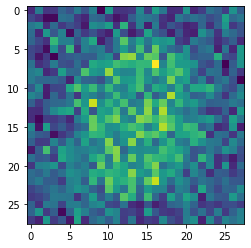

In [216]:
plt.imshow(amostras_teste[0].reshape(28,28))

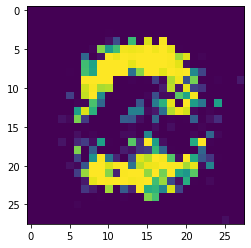

In [217]:
plt.imshow(amostras_teste[99].reshape(28,28))

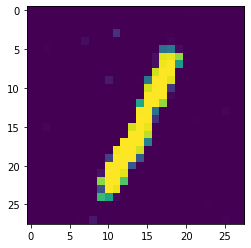

In [218]:
plt.imshow(amostras_teste[199].reshape(28,28))

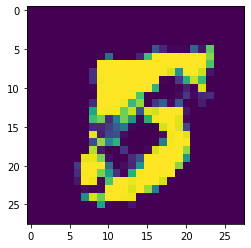

In [219]:
plt.imshow(amostras_teste[299].reshape(28,28))

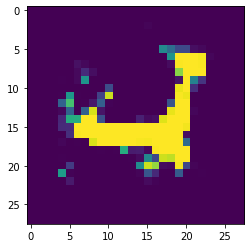

In [220]:
plt.imshow(amostras_teste[399].reshape(28,28))

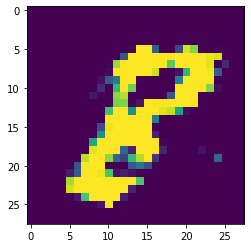

In [228]:
plt.imshow(amostras_teste[499].reshape(28,28))